In [1]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np # linear algebra
import os
import random
import sys

In [2]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
## 데이터 불러오기
med19 = pd.read_csv('./Medical_Check_2019.csv')
med19 = med19.drop(['결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상'], axis=1)

med18 = pd.read_csv('./Medical_Check_2018.csv')
med18 = med18.drop(['결손치유무', '치아마모증유무', '제3대구치(사랑니)이상'], axis=1)

med17 = pd.read_csv('./Medical_Check_2017.csv')
med17 = med17.drop(['결손치유무', '치아마모증유무', '제3대구치(사랑니)이상'], axis=1)

med16 = pd.read_csv('./Medical_Check_2016.csv')
# med16 = med16.drop(['결손치유무', '치아마모증유무', '제3대구치(사랑니)이상'], axis=1)

In [4]:
## 19년도 컬럼 재배치
med19 = med19.loc[:, ['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', 
                      '시도코드', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', 
                      '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
                      '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 
                      'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', 
                      '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', 
                      '음주여부', '구강검진 수검여부', '치아우식증유무', '치석', '데이터 공개일자']]
med19.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '치석', '데이터 공개일자'],
      dtype='object')

In [5]:
## 시도코드 변환
med19['시도코드'] = med19['시도코드'].map({11: '서울특별시', 41: '경기도', 42: '강원도', 26: '부산광역시', 27: '대구광역시', 28: '인천광역시',
                                 29: '광주광역시', 30: '대전광역시', 31: '울산광역시', 36: '세종시', 
                                 43: '충청북도', 44: '충청남도', 45: '전라북도', 46: '전라남도', 47: '경상북도', 48: '경상남도', 50: '제주도'})
med18['시도코드'] = med18['시도코드'].map({11: '서울특별시', 41: '경기도', 42: '강원도', 26: '부산광역시', 27: '대구광역시', 28: '인천광역시',
                                 29: '광주광역시', 30: '대전광역시', 31: '울산광역시', 36: '세종시', 
                                 43: '충청북도', 44: '충청남도', 45: '전라북도', 46: '전라남도', 47: '경상북도', 48: '경상남도', 50: '제주도'})
med17['시도코드'] = med17['시도코드'].map({11: '서울특별시', 41: '경기도', 42: '강원도', 26: '부산광역시', 27: '대구광역시', 28: '인천광역시',
                                 29: '광주광역시', 30: '대전광역시', 31: '울산광역시', 36: '세종시', 
                                 43: '충청북도', 44: '충청남도', 45: '전라북도', 46: '전라남도', 47: '경상북도', 48: '경상남도', 49: '제주도'})
med16['시도코드'] = med16['시도코드'].map({11: '서울특별시', 41: '경기도', 42: '강원도', 26: '부산광역시', 27: '대구광역시', 28: '인천광역시',
                                 29: '광주광역시', 30: '대전광역시', 31: '울산광역시', 36: '세종시', 
                                 43: '충청북도', 44: '충청남도', 45: '전라북도', 46: '전라남도', 47: '경상북도', 48: '경상남도', 49: '제주도'})

In [6]:
## 데이터 합치기
med_total = pd.concat([med19, med18, med17, med16], ignore_index=True)
med_total.shape

(4000000, 31)

In [7]:
## 4개 항목 제거
med_total = med_total.drop(['기준년도', '가입자일련번호','치아우식증유무',
                            '치석', '데이터 공개일자'], axis=1)
## 결측치 제거
med_total_1 = med_total.dropna()

In [8]:
med_total_1

,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진 수검여부
2,1,13,경기도,160.0,70.0,87.0,0.9,0.8,1.0,1.0,...,152.0,15.6,1.0,1.0,30.0,21.0,17.0,1.0,1,0
5,1,8,서울특별시,170.0,110.0,107.8,1.2,1.5,1.0,1.0,...,150.0,14.8,1.0,0.9,42.0,44.0,129.0,1.0,1,0
6,1,6,경기도,175.0,70.0,81.3,0.9,1.0,1.0,1.0,...,93.0,13.1,1.0,0.9,14.0,11.0,30.0,2.0,1,1
12,2,11,경상북도,150.0,65.0,94.0,1.2,1.0,1.0,1.0,...,176.0,13.9,1.0,0.8,22.0,13.0,39.0,1.0,1,0
25,1,13,경상북도,165.0,65.0,82.0,0.9,0.8,1.0,1.0,...,145.0,16.0,1.0,1.0,30.0,26.0,56.0,2.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999995,1,8,경기도,170.0,70.0,88.0,1.2,1.0,1.0,1.0,...,123.0,14.9,1.0,1.1,16.0,23.0,28.0,1.0,Y,N
3999996,1,7,경기도,175.0,60.0,73.0,1.2,1.0,1.0,1.0,...,95.0,15.7,1.0,0.9,20.0,11.0,14.0,1.0,Y,Y
3999997,1,13,강원도,165.0,70.0,94.0,0.9,0.9,1.0,1.0,...,100.0,16.4,1.0,0.9,19.0,20.0,75.0,3.0,N,N
3999998,1,12,인천광역시,175.0,65.0,82.0,0.6,0.7,1.0,1.0,...,72.0,14.4,1.0,1.1,25.0,20.0,30.0,3.0,Y,N


In [9]:
med_total_1['연령대코드(5세단위)'] = med_total_1['연령대코드(5세단위)'].map(
    {5: '20~24', 6:'25~29', 7:'30~34', 8:'35~39', 9:'40~44', 10:'45~49', 11:'50~54',
    12:'55~59', 13:'60~64', 14:'65~69', 15:'70~74', 16:'75~79', 17:'80~84', 18:'85+'})
med_total_1['연령대코드(5세단위)']

<ipython-input-9-c90cac5f3ce9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  med_total_1['연령대코드(5세단위)'] = med_total_1['연령대코드(5세단위)'].map(


2          60~64
5          35~39
6          25~29
12         50~54
25         60~64
           ...  
3999995    35~39
3999996    30~34
3999997    60~64
3999998    55~59
3999999    50~54
Name: 연령대코드(5세단위), Length: 1382581, dtype: object

In [10]:
age_5 = med_total_1[med_total_1['연령대코드(5세단위)'] == '20~24']
age_6 = med_total_1[med_total_1['연령대코드(5세단위)'] == '25~29']
age_7 = med_total_1[med_total_1['연령대코드(5세단위)'] == '30~34']
age_8 = med_total_1[med_total_1['연령대코드(5세단위)'] == '35~39']
age_9 = med_total_1[med_total_1['연령대코드(5세단위)'] == '40~44']
age_10 = med_total_1[med_total_1['연령대코드(5세단위)'] == '45~49']
age_11 = med_total_1[med_total_1['연령대코드(5세단위)'] == '50~54']
age_12 = med_total_1[med_total_1['연령대코드(5세단위)'] == '55~59']
age_13 = med_total_1[med_total_1['연령대코드(5세단위)'] == '60~64']
age_14 = med_total_1[med_total_1['연령대코드(5세단위)'] == '65~69']
age_15 = med_total_1[med_total_1['연령대코드(5세단위)'] == '70~74']
age_16 = med_total_1[med_total_1['연령대코드(5세단위)'] == '75~79']
age_17 = med_total_1[med_total_1['연령대코드(5세단위)'] == '80~84']
age_18 = med_total_1[med_total_1['연령대코드(5세단위)'] == '85+']

In [11]:
age_20 = pd.merge(age_5,age_6,how = 'outer')
age_30 = pd.merge(age_7,age_8,how = 'outer')
age_40 = pd.merge(age_9,age_10,how = 'outer')
age_50 = pd.merge(age_11,age_12,how = 'outer')
age_60 = pd.merge(age_13,age_14,how = 'outer')
age_70 = pd.merge(age_15,age_16,how = 'outer')
age_80 = pd.merge(age_17,age_18,how = 'outer')

In [12]:
age_20

,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진 수검여부
0,1,20~24,경상북도,175.0,90.0,93.0,1.2,1.2,1.0,1.0,...,117.0,15.1,1.0,0.7,29.0,37.0,26.0,1.0,1,1
1,1,20~24,울산광역시,165.0,70.0,87.0,0.7,0.3,1.0,1.0,...,50.0,15.6,1.0,1.0,32.0,37.0,29.0,1.0,1,1
2,1,20~24,부산광역시,170.0,75.0,79.0,0.9,1.0,1.0,1.0,...,84.0,17.0,1.0,0.9,18.0,15.0,18.0,1.0,1,0
3,1,20~24,경기도,185.0,70.0,80.0,1.5,1.5,1.0,1.0,...,77.0,15.9,1.0,0.9,24.0,23.0,23.0,1.0,1,1
4,1,20~24,대구광역시,175.0,60.0,75.0,2.0,1.2,1.0,1.0,...,62.0,16.1,1.0,0.7,23.0,20.0,32.0,2.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111592,2,25~29,경기도,150.0,45.0,76.0,0.8,0.7,1.0,1.0,...,73.0,12.1,1.0,0.7,20.0,12.0,10.0,1.0,Y,N
111593,1,25~29,경상남도,170.0,65.0,77.0,0.9,1.0,1.0,1.0,...,71.0,13.8,1.0,0.8,23.0,24.0,34.0,1.0,Y,N
111594,1,25~29,경기도,170.0,70.0,81.0,1.2,1.2,1.0,1.0,...,65.0,14.4,1.0,0.7,24.0,13.0,35.0,3.0,N,Y
111595,1,25~29,경기도,160.0,50.0,76.0,0.9,1.0,1.0,1.0,...,100.0,13.5,1.0,1.2,22.0,14.0,13.0,1.0,Y,N


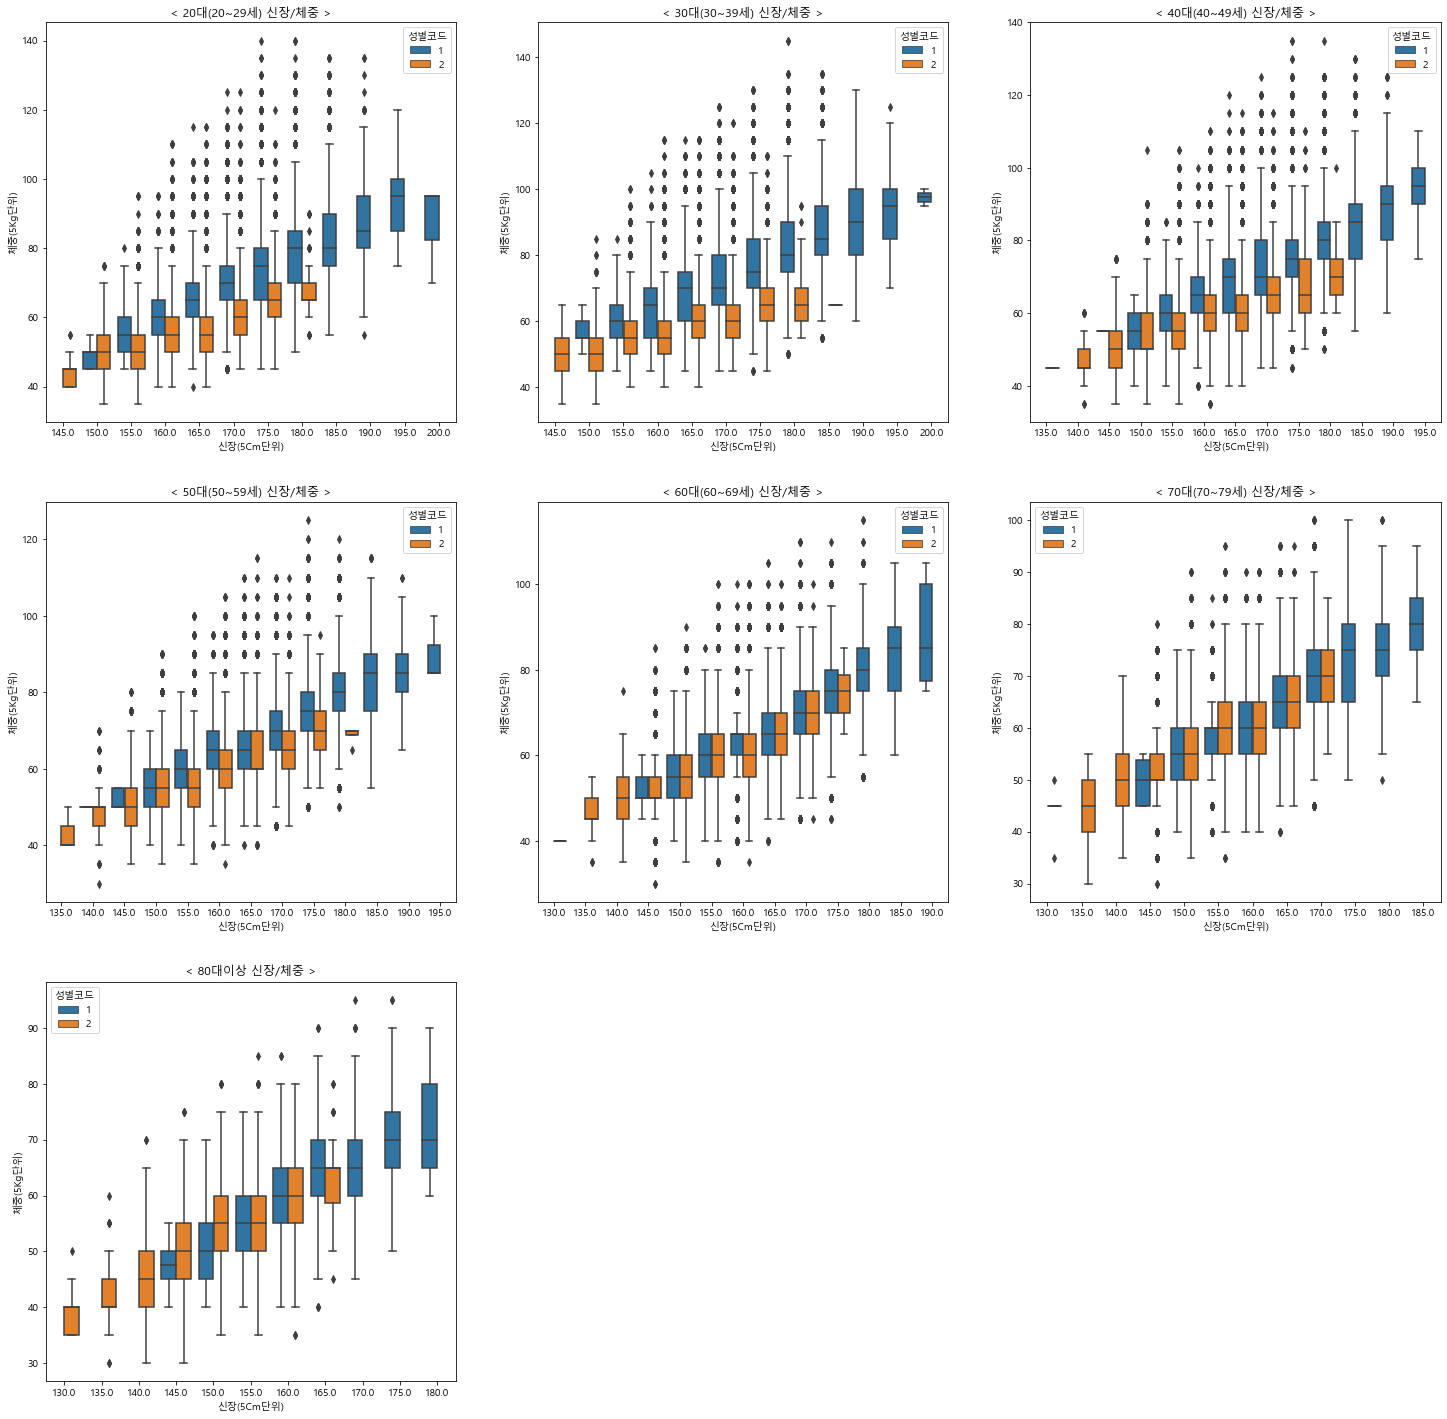

In [13]:
### 연령대별 boxplot 신장/체중

plt.figure(figsize=(25,25), facecolor='white')

plt.subplot(331)
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=age_20)
plt.title('< 20대(20~29세) 신장/체중 >')

plt.subplot(332)
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=age_30)
plt.title('< 30대(30~39세) 신장/체중 >')

plt.subplot(333)
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=age_40)
plt.title('< 40대(40~49세) 신장/체중 >')

plt.subplot(334)
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=age_50)
plt.title('< 50대(50~59세) 신장/체중 >')

plt.subplot(335)
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=age_60)
plt.title('< 60대(60~69세) 신장/체중 >')

plt.subplot(336)
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=age_70)
plt.title('< 70대(70~79세) 신장/체중 >')

plt.subplot(337)
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=age_80)
plt.title('< 80대이상 신장/체중 >')

plt.show()

Text(0.5, 1.0, '< 20대(20~29세) 신장/체중 >')

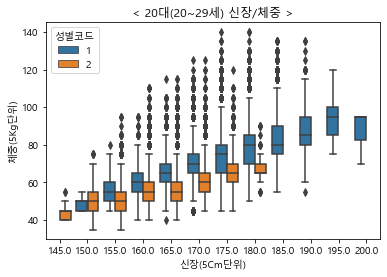

In [14]:
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=age_20)
plt.title('< 20대(20~29세) 신장/체중 >')

Text(0.5, 1.0, '< 30대(30~39세) 신장/체중 >')

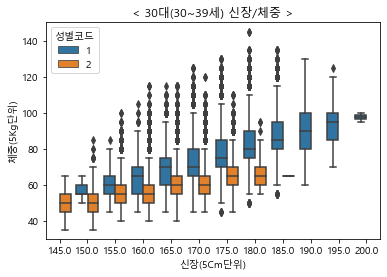

In [15]:
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=age_30)
plt.title('< 30대(30~39세) 신장/체중 >')

Text(0.5, 1.0, '< 40대(40~49세) 신장/체중 >')

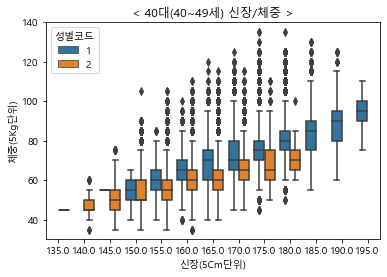

In [16]:
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=age_40)
plt.title('< 40대(40~49세) 신장/체중 >')

Text(0.5, 1.0, '< 50대(50~59세) 신장/체중 >')

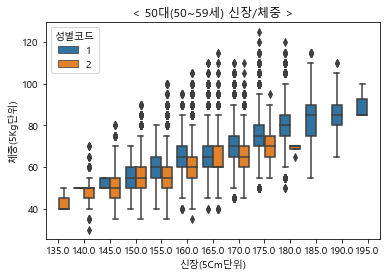

In [17]:
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=age_50)
plt.title('< 50대(50~59세) 신장/체중 >')

Text(0.5, 1.0, '< 60대(60~69세) 신장/체중 >')

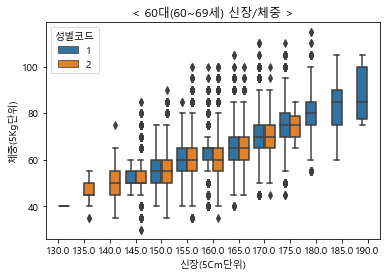

In [18]:
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=age_60)
plt.title('< 60대(60~69세) 신장/체중 >')

Text(0.5, 1.0, '< 70대(70~79세) 신장/체중 >')

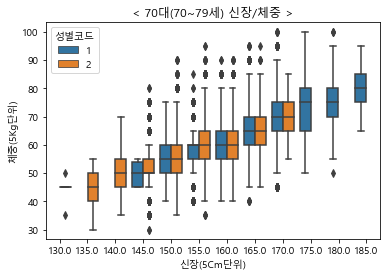

In [19]:
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=age_70)
plt.title('< 70대(70~79세) 신장/체중 >')

Text(0.5, 1.0, '< 80대이상 신장/체중 >')

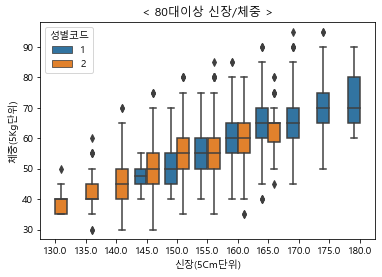

In [20]:
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=age_80)
plt.title('< 80대이상 신장/체중 >')